# Neural Networks – Perceptron Introduction Notebook

In this lab we will explore the basics of neural networks by building a simple perceptron from scratch using NumPy and then extending our work to experiment with gradient descent variants. Later, we will implement a simple feed‐forward neural network with Keras using the Olivetti faces dataset. Finally, we will explore how alternative activation functions and different layer configurations affect performance and intermediate outputs.

## Basic Perceptron using NumPy

In this section we create a small dataset and define functions to compute the perceptron output, apply the Heaviside step activation, and update the weights using full-batch gradient descent.

In [1]:
import numpy as np

# define a small dataset
# each row: [hours of exercise, cups of coffee] (with an additional bias term at the start)
# labels: 1 (insomnia) or 0 (no insomnia)
X = np.array([
    [1, 1, 3],
    [1, 2, 4],
    [1, 3, 6],
    [1, 3, 1],
    [1, 4, 3],
    [1, 5, 2],
    [1, 6, 1],
    [1, 2, 6],
    [1, 1, 5],
    [1, 0, 4],
    [1, 4, 5],
    [1, 5, 6],
    [1, 3, 3],
    [1, 6, 0],
    [1, 0, 1],
    [1, 2, 0],
    [1, 1, 0],
    [1, 0, 0],
    [1, 5, 3],
    [1, 4, 1]
])

y = np.array([
    1, 1, 1, 0, 0,
    0, 0, 1, 1, 1,
    0, 0, 1, 0, 1,
    1, 1, 1, 0, 0
])

The code above imports NumPy and creates a dataset with five samples. Each sample has two features (hours of exercise and cups of coffee), and an associated binary label indicating insomnia.

Next, let's create the perceptron which will take the dot product of our predictors and weights.

In [2]:
def perceptron_output(x, weights):
    """Computes the weighted sum (dot product) for the perceptron."""
    return np.dot(x, weights)

In [3]:
# example usage of the perceptron
init_weights = np.array([0.0, 0.0, 0.0])

perceptron_output(X, init_weights)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

We also need to implement a function to detect if our perceptron output "fires" via the heaviside function.

It returns an array where each element is 1 if the corresponding element in x is greater than or equal to zero, otherwise 0. 

In [4]:
def heaviside(x):
    """Applies the Heaviside step function element-wise on x. Returns 1 if x >= 0, else 0."""
    return np.where(x >= 0, 1, 0)

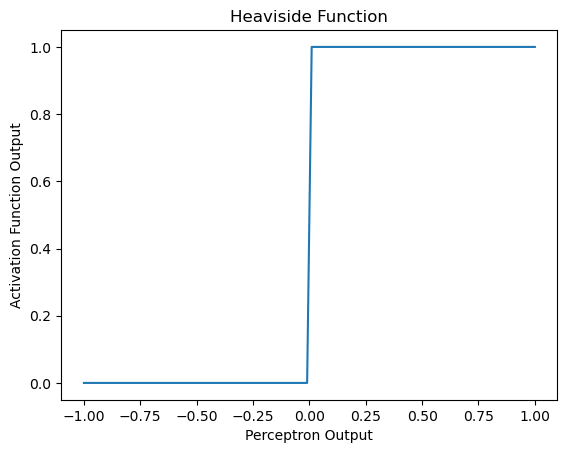

In [5]:
import matplotlib.pyplot as plt

x_axis = np.linspace(-1, 1, 100)
activations = [heaviside(x) for x in x_axis]

plt.plot(x_axis, activations)
plt.title("Heaviside Function")
plt.xlabel("Perceptron Output")
plt.ylabel("Activation Function Output")
plt.show()

In [6]:
# example usage of the heaviside function on our perceptron outputs on our initial weights

# everyone has insomnia!
heaviside(perceptron_output(X, init_weights))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
yhat = heaviside(perceptron_output(X, init_weights))
error_rate = abs(sum(y - yhat) / len(y))

print("Current error rate:", error_rate)

Current error rate: 0.45


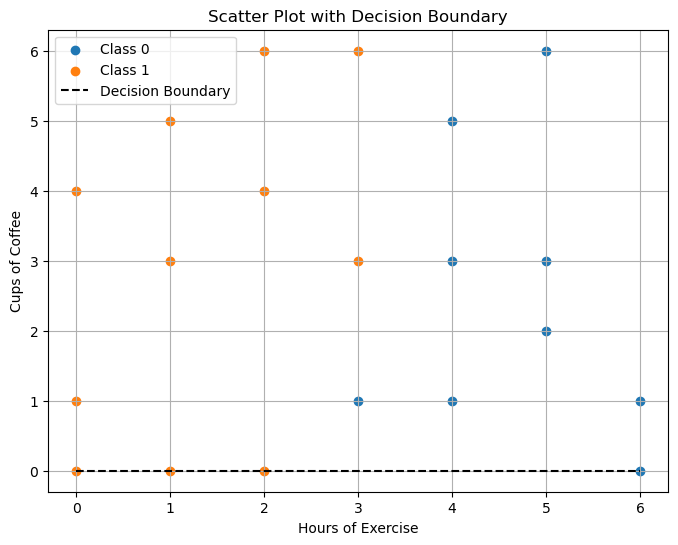

In [8]:
import matplotlib.pyplot as plt 

# define a function to plot data for the decision boundary
def decision_boundary(X, y, weights):
    plt.figure(figsize=(8, 6))

    # plot each scatter point
    for label in np.unique(y):
        subset = X[y == label]
        plt.scatter(subset[:, 1], subset[:, 2], label=f"Class {label}")

    # define the x & y vals of the decision boundary
    x_vals = np.linspace(0, 6, 100)
    y_vals = - (weights[0] + weights[1] * x_vals) / (weights[2] + 1e-6)
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
    plt.xlabel("Hours of Exercise")
    plt.ylabel("Cups of Coffee")
    plt.title("Scatter Plot with Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

decision_boundary(X, y, init_weights)

As we an see, our predictions are erroneous. We need a mechanism to make corrections on our weights, we need `gradient_descent`.

The `gradient_descent_update` function computes predictions using the current weights, calculates the error with respect to the true labels, and then updates the weights using full-batch gradient descent. The learning rate (`lr`) controls the step size for the update. 

In [9]:
def gradient_descent_update(X, y, weights, lr):
    """Performs one update of full-batch gradient descent on the weights.
    - X: Input feature matrix
    - y: True labels
    - weights: Current weight vector
    - lr: Learning rate
    Returns the updated weights."""
    preds = heaviside(perceptron_output(X, weights))
    error = y - preds
    delta = lr * np.dot(X.T, error) / X.shape[0]
    weights += delta
    return weights

In [10]:
# one iteration of full-batch gradient descent
learning_rate = 0.1

updated_weights = gradient_descent_update(X, y, init_weights, lr=learning_rate)
yhat = heaviside(perceptron_output(X, updated_weights))

print("New weights", updated_weights)
print("New predictions", yhat)

New weights [-0.045 -0.21  -0.11 ]
New predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
error_rate = abs(sum(y - yhat) / len(y))

print("Current error rate:", error_rate)

Current error rate: 0.55


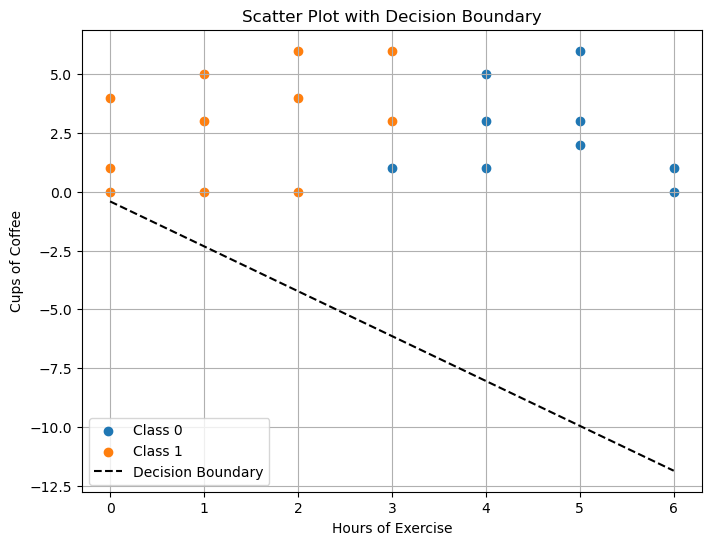

In [12]:
# plot decision boundary of updated weights
decision_boundary(X, y, updated_weights)

It seems like error rate isn't improving! Well, this is why gradient descent is an iterative proces..

Let's try out a few more runs (epochs) of gradient descent, and why don't we also try changing the `learning_rate` and `epochs` to see what happens to our final error rate.

In [13]:
# Initialize weights to zeros (one weight per feature)
weights = np.array([0.0, 0.0, 0.0])

# TODO: Change this learning rate to see how this hyperparameter influences training
learning_rate = 0.01
# TODO: Change the number of epochs see how training duration influences final error rate
epoch_count = 100

epochs = []
learned_weights = []
errors = []

for epoch in range(epoch_count):
    new_weights = gradient_descent_update(X, y, weights, lr=learning_rate)
    yhat = heaviside(perceptron_output(X, new_weights))
    error_rate = abs(sum(y - yhat) / len(y))

    print(f"Epoch {epoch}: Weights = {weights}")
    print("error rate = ", error_rate)

    epochs.append(epoch)
    learned_weights.append(new_weights)
    errors.append(error_rate)

Epoch 0: Weights = [-0.0045 -0.021  -0.011 ]
error rate =  0.55
Epoch 1: Weights = [ 0.001  -0.0135  0.005 ]
error rate =  0.25
Epoch 2: Weights = [ 0.0035 -0.008   0.0115]
error rate =  0.05
Epoch 3: Weights = [ 0.003  -0.013   0.0045]
error rate =  0.25
Epoch 4: Weights = [ 0.0055 -0.0075  0.011 ]
error rate =  0.1
Epoch 5: Weights = [ 0.0045 -0.015   0.0025]
error rate =  0.35
Epoch 6: Weights = [ 0.008  -0.008   0.0135]
error rate =  0.15
Epoch 7: Weights = [ 0.0065 -0.016   0.005 ]
error rate =  0.25
Epoch 8: Weights = [ 0.009  -0.0105  0.0115]
error rate =  0.05
Epoch 9: Weights = [ 0.0085 -0.0155  0.0045]
error rate =  0.25
Epoch 10: Weights = [ 0.011 -0.01   0.011]
error rate =  0.1
Epoch 11: Weights = [ 0.01   -0.0155  0.004 ]
error rate =  0.25
Epoch 12: Weights = [ 0.0125 -0.01    0.0105]
error rate =  0.1
Epoch 13: Weights = [ 0.0115 -0.0155  0.0035]
error rate =  0.25
Epoch 14: Weights = [ 0.014 -0.01   0.01 ]
error rate =  0.1
Epoch 15: Weights = [ 0.013  -0.0155  0.003 ]

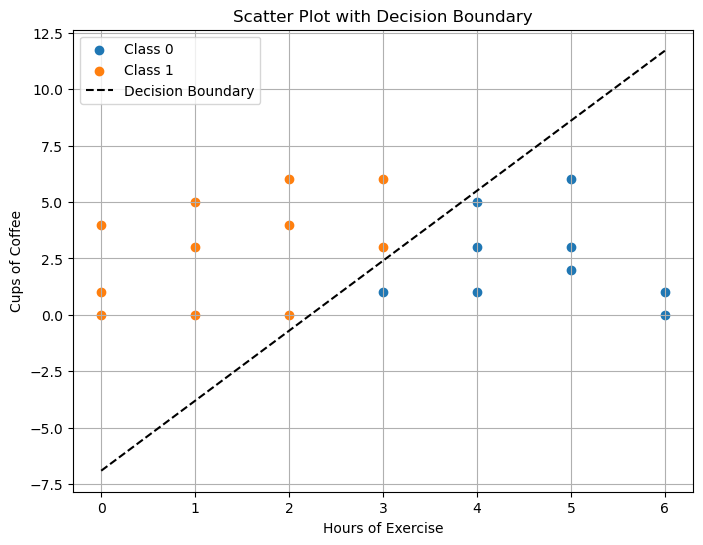

In [14]:
# plot decision boundary of final weights
decision_boundary(X, y, learned_weights[-1])

This training loop initializes the weight vector as zeros and then iteratively updates it using the full-batch gradient descent function. After each epoch, the updated weights are printed, illustrating how the model learns over time.

While this decision boundary might not be't perfect, note that training error is *largely* decreasing as we increase our epochs.

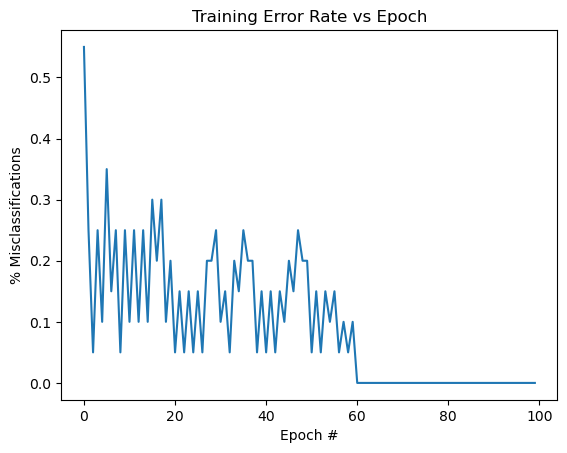

In [15]:
def plot_errors(epochs, errors):
    plt.plot(epochs, errors)
    plt.xlabel("Epoch #")
    plt.ylabel("% Misclassifications")
    plt.title("Training Error Rate vs Epoch")

plot_errors(epochs, errors)

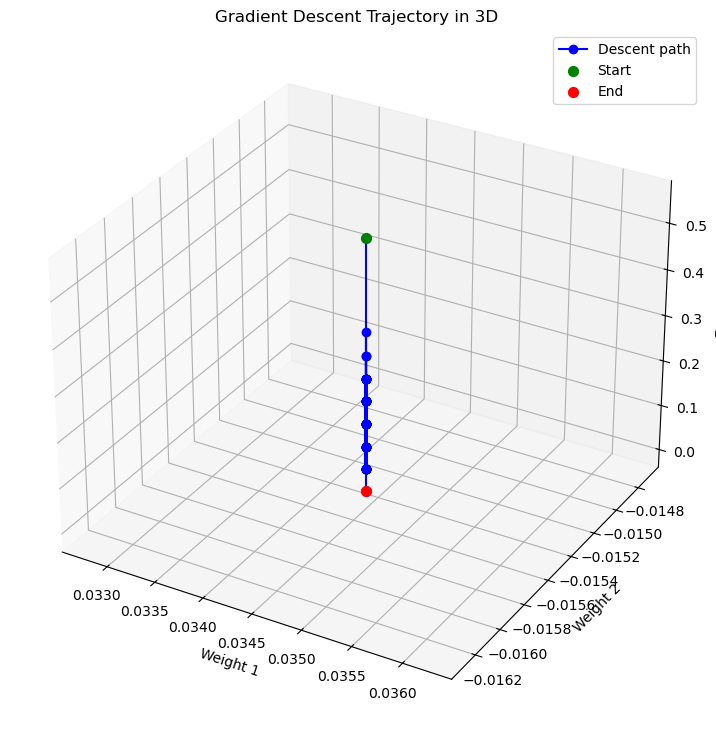

In [16]:
import matplotlib.pyplot as plt 

# create a function which plots the path of your full-batch gradient descent
def plot_descent(weights, errors):
    w1 = [w[0] for w in weights]
    w2 = [w[1] for w in weights]

    fig = plt.figure(figsize=(15, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory of gradient descent
    ax.plot(w1, w2, errors, marker='o', color='blue', label='Descent path')

    # Highlight start and end
    ax.scatter(w1[0], w2[0], errors[0], color='green', s=50, label='Start')
    ax.scatter(w1[-1], w2[-1], errors[-1], color='red', s=50, label='End')

    # Label axes
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Error')
    ax.set_title('Gradient Descent Trajectory in 3D')
    ax.legend()

    plt.show()

# plot full batch gradient descent
plot_descent(learned_weights, errors)

## Gradient Descent Variants using NumPy

Here we explore alternative gradient descent methods, including mini-batch and stochastic gradient descent.

### Mini-Batch Gradient Descent

In [17]:
def mini_batch_gradient_descent(X, y, weights, lr, batch_size):
    n, perm = X.shape[0], np.random.permutation(X.shape[0])
    X_shuf, y_shuf = X[perm], y[perm]
    for i in range(0, n, batch_size):
        xb, yb = X_shuf[i:i+batch_size], y_shuf[i:i+batch_size]
        p = heaviside(np.dot(xb, weights))
        e = yb - p
        dw = lr * np.dot(xb.T, e) / len(yb)
        weights += dw
    return weights

The `mini_batch_gradient_descent` function shuffles the dataset and divides it into mini-batches. For each mini-batch, it applies the gradient descent update. This approach can provide a balance between the stability of full-batch and the speed of stochastic gradient descent.

In [18]:
# Initialize weights to zeros (one weight per feature)
weights = np.array([0.0, 0.0, 0.0])

epochs = []
learned_weights = []
errors = []

for epoch in range(epoch_count):
    new_weights = mini_batch_gradient_descent(X, y, weights, lr=learning_rate, batch_size=4)
    yhat = heaviside(perceptron_output(X, new_weights))
    error_rate = abs(sum(y - yhat) / len(y))

    print(f"Epoch {epoch}: Weights = {weights}")
    print("error rate = ", error_rate)

    epochs.append(epoch)
    learned_weights.append(new_weights)
    errors.append(error_rate)

Epoch 0: Weights = [ 0.0025 -0.0325 -0.0125]
error rate =  0.5
Epoch 1: Weights = [ 0.015  -0.0175  0.015 ]
error rate =  0.0
Epoch 2: Weights = [ 0.0225 -0.0175  0.0125]
error rate =  0.05
Epoch 3: Weights = [ 0.025 -0.03   0.005]
error rate =  0.3
Epoch 4: Weights = [ 0.03   -0.0225  0.015 ]
error rate =  0.05
Epoch 5: Weights = [ 0.03 -0.03  0.01]
error rate =  0.15
Epoch 6: Weights = [ 0.035 -0.03   0.005]
error rate =  0.2
Epoch 7: Weights = [ 0.04   -0.0225  0.0125]
error rate =  0.05
Epoch 8: Weights = [ 0.04   -0.0325  0.0125]
error rate =  0.1
Epoch 9: Weights = [ 0.0425 -0.0425  0.01  ]
error rate =  0.25
Epoch 10: Weights = [ 0.0475 -0.04    0.01  ]
error rate =  0.15
Epoch 11: Weights = [ 0.0525 -0.0325  0.015 ]
error rate =  0.1
Epoch 12: Weights = [ 0.0525 -0.035   0.015 ]
error rate =  0.1
Epoch 13: Weights = [ 5.2500000e-02 -4.5000000e-02 -6.9388939e-18]
error rate =  0.25
Epoch 14: Weights = [ 0.0575 -0.0425  0.005 ]
error rate =  0.2
Epoch 15: Weights = [ 0.06   -0.04

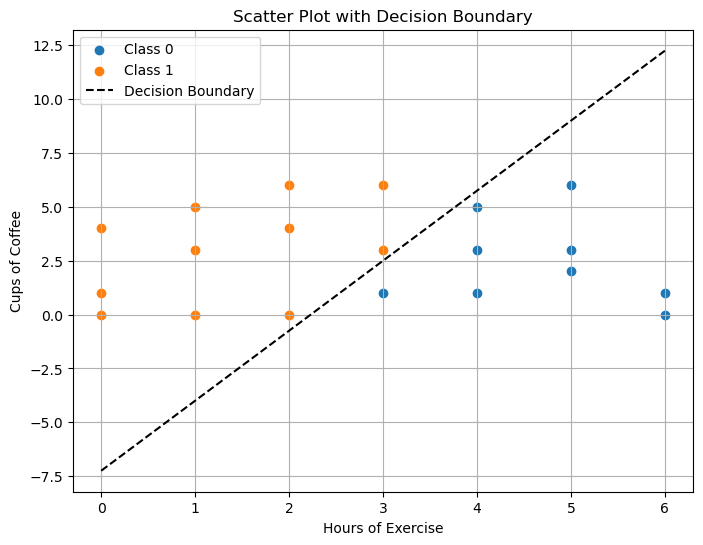

In [19]:
# plot final decision boundary
decision_boundary(X, y, learned_weights[-1])

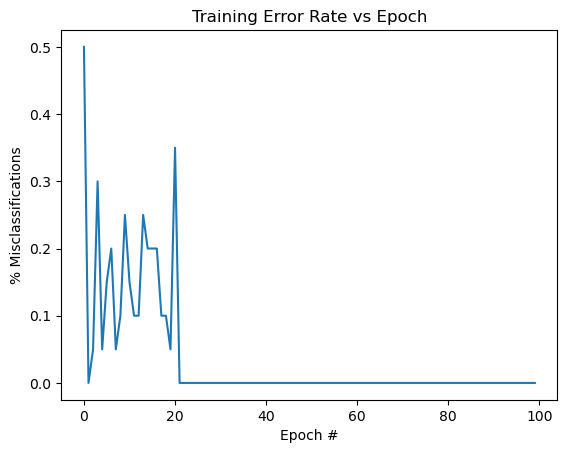

In [20]:
# plot errors of mini-batch
plot_errors(epochs, errors)

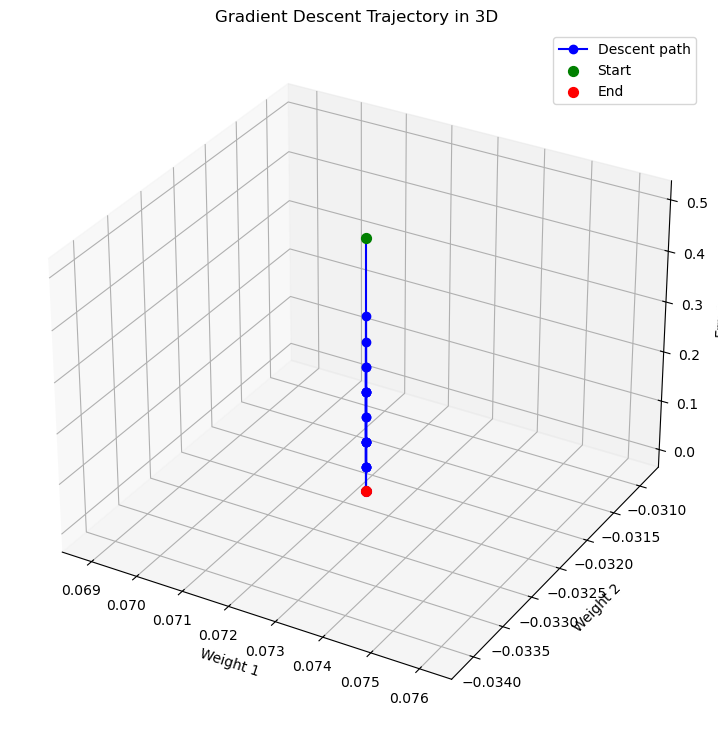

In [21]:
# plot the path of your mini-batch gradient descent
plot_descent(learned_weights, errors)

### Stochastic Gradient Descent

In [22]:
def stochastic_gradient_descent(X, y, weights, lr):
    n = X.shape[0]
    perm = np.random.permutation(n)
    X_shuf, y_shuf = X[perm], y[perm]
    for i in range(n):
        xi, yi = X_shuf[i], y_shuf[i]
        p = heaviside(np.dot(xi, weights))
        e = yi - p
        weights += lr * xi * e
    return weights

The `stochastic_gradient_descent` function updates the weights one sample at a time after shuffling the data. This method can potentially converge faster but may be noisier than the full-batch approach.

In [23]:
# Initialize weights to zeros (one weight per feature)
weights = np.array([0.0, 0.0, 0.0])

epochs = []
learned_weights = []
errors = []

for epoch in range(epoch_count):
    new_weights = stochastic_gradient_descent(X, y, weights, lr=learning_rate)
    yhat = heaviside(perceptron_output(X, new_weights))
    error_rate = abs(sum(y - yhat) / len(y))

    print(f"Epoch {epoch}: Weights = {weights}")
    print("error rate = ", error_rate)

    epochs.append(epoch)
    learned_weights.append(new_weights)
    errors.append(error_rate)

Epoch 0: Weights = [ 0.02 -0.08  0.01]
error rate =  0.4
Epoch 1: Weights = [ 0.05 -0.06  0.05]
error rate =  0.0
Epoch 2: Weights = [ 0.06 -0.08  0.04]
error rate =  0.15
Epoch 3: Weights = [ 0.08 -0.07  0.04]
error rate =  0.1
Epoch 4: Weights = [ 0.08 -0.09  0.04]
error rate =  0.15
Epoch 5: Weights = [ 0.09 -0.11  0.01]
error rate =  0.3
Epoch 6: Weights = [ 0.11 -0.09  0.07]
error rate =  0.05
Epoch 7: Weights = [ 0.13 -0.1   0.06]
error rate =  0.0
Epoch 8: Weights = [ 0.14 -0.09  0.04]
error rate =  0.1
Epoch 9: Weights = [ 0.15 -0.08  0.02]
error rate =  0.1
Epoch 10: Weights = [ 0.17 -0.04  0.06]
error rate =  0.35
Epoch 11: Weights = [ 0.17 -0.1   0.04]
error rate =  0.1
Epoch 12: Weights = [ 0.18 -0.1   0.04]
error rate =  0.1
Epoch 13: Weights = [ 0.18 -0.1   0.06]
error rate =  0.05
Epoch 14: Weights = [ 0.18 -0.14  0.06]
error rate =  0.1
Epoch 15: Weights = [ 0.19 -0.13  0.07]
error rate =  0.0
Epoch 16: Weights = [ 0.2  -0.12  0.05]
error rate =  0.1
Epoch 17: Weights =

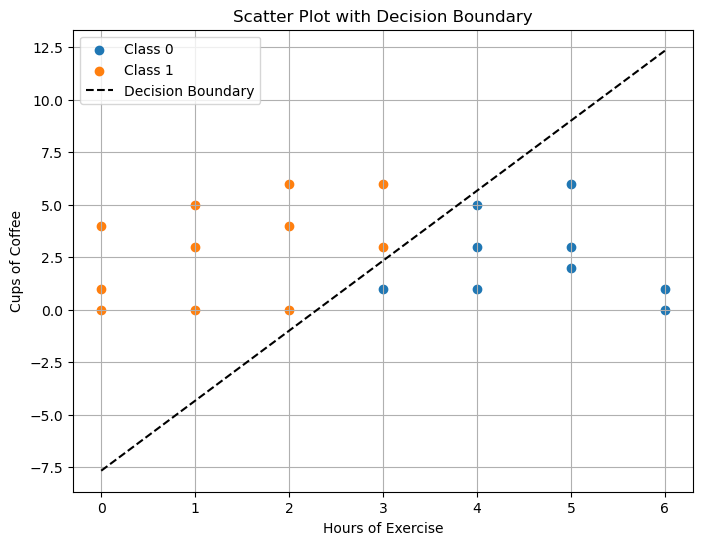

In [24]:
# plot final decision boundary
decision_boundary(X, y, learned_weights[-1])

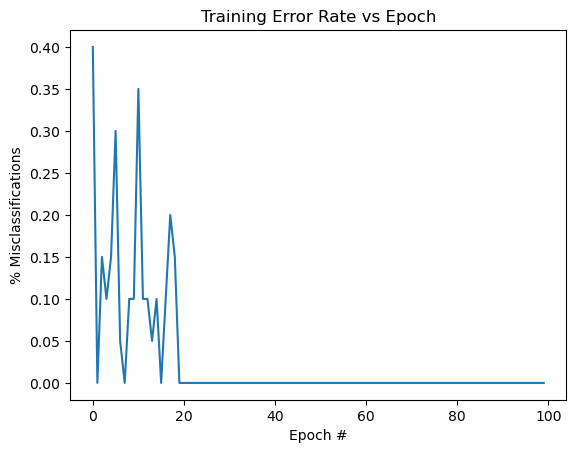

In [25]:
# plot errors of mini-batch
plot_errors(epochs, errors)

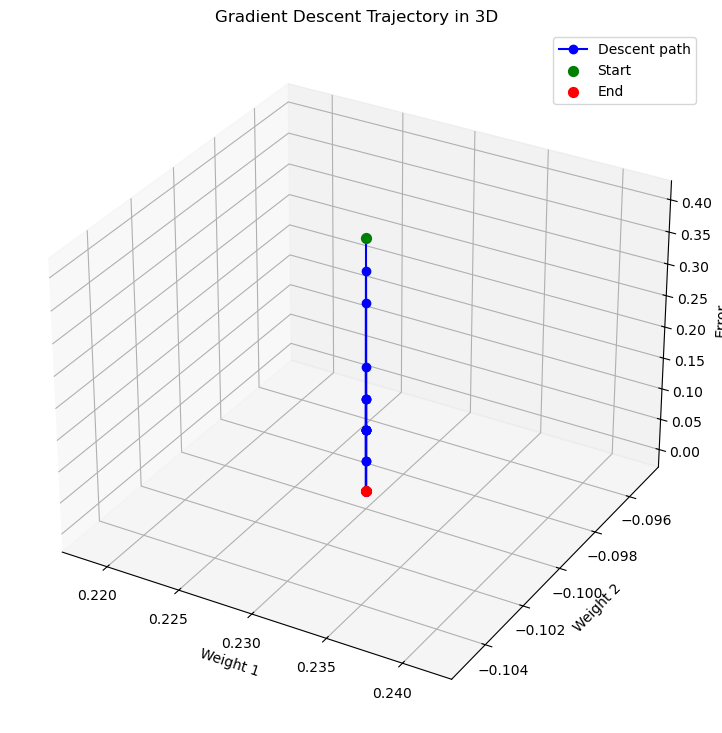

In [26]:
# plot the path of your stochastic gradient descent
plot_descent(learned_weights, errors)

## Multi-Layer Perceptrons using Numpy

In this section we use numpy to implement a multi-layer perceptron network on a non-linearaly seperable dataset. We will explore how using different activation functions (and more layers) give us the ability to classify datasets with non-linear boundaries.

In [27]:
import numpy as np

# define a non-linear dataset (with an added bias term)
X = np.array([
    [1, 2, 4], [1, 2.5, 4.5], [1, 3.0, 5.0], [1, 3.5, 4.5], [1, 4.0, 4.0],
    [1, 3.5, 3.5], [1, 4, 2], [1, 3.0, 3.0], [1, 2.5, 3.5], [1, 2.0, 4.0],
    [1, 3.0, 4.0], [1, 3.25, 4.25], [1, 2.75, 3.75], [1, 3.25, 3.75], [1, 2.75, 4.25]  
])

center = np.array([3, 4])
radius = 0.5

# label using circular rule: if inside radius → 1, else 0
features = X[:, 1:3]  
distances = np.linalg.norm(features - center, axis=1)
y = (distances < radius).astype(int)

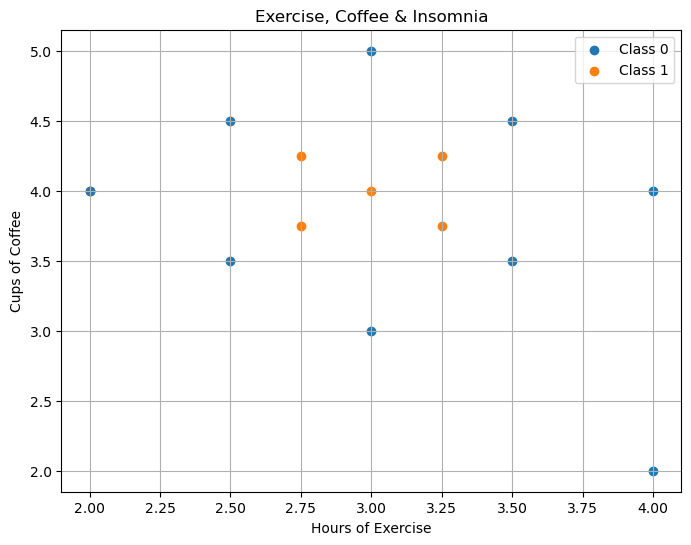

In [28]:
plt.figure(figsize=(8, 6))

# plot each scatter point
for label in np.unique(y):
    subset = X[y == label]
    plt.scatter(subset[:, 1], subset[:, 2], label=f"Class {label}")

plt.xlabel("Hours of Exercise")
plt.ylabel("Cups of Coffee")
plt.title("Exercise, Coffee & Insomnia")
plt.legend()
plt.grid(True)
plt.show()

Regardless of how many epochs we utilize or if our learning rate is "good" enough, we will never fit a linear boundary on a non-linear dataset.

To acheive non-linearity we must utilize a network of neurons, also known as multi-layer perceptron (MLP) to recognize the boundaries of our dataset and subsequently create one final non-linear decision boundaries.

Choosing the appropirate number of hidden layers & nodes within hidden layers is not a trivial task and cannot be answered simply. This often depends on your search space (the dataset) and how many classes we are aiming to categorize.

As a good rule of thumb, this [StackOverflow answer](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) recommends the following rules:
* **The Input Layer**: This layer could be dependent on the number of predictor our dataset has. So for example, if we have 10 columns within our dataset, we will also have 11 input nodes (+1 for the bias term).  
* **The Output Layer**: This layer is completely dependent on the amount of categories we are looking to predict. So if we have two categories in our dataset (e.g. `fraud` vs `not fraud`), we will have only two output nodes.  
* **The Hidden Layers**: As expressed in the post, we only need hidden layers if our dataset contains non-linear boundaries. Once we determine that we do need a hidden layer (most prediction tasks can be sufficiently solved with only one hidden layer), we can arbitrarily choose a number of nodes somewhere between the input size and the output size (as expressed by Jeff Heaton).  

For this machine learning task, we will use 3 input nodes, 2 hidden node, and 1 output node.

In [29]:
def forward_pass(X, W1, W2):
    """Performs a forward pass of the MLP"""
    Z1 = heaviside(perceptron_output(X, W1))         # Hidden layer activation
    Z2 = heaviside(perceptron_output(Z1, W2))       # Output layer activation
    return Z2

def initialize_weights(input_size, hidden_size, output_size):
    """Randomly initialize weights for input → hidden and hidden → output layers"""
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    return W1, W2

In [30]:
input_nodes = 3
hidden_nodes = 2
output_size = 1

# initialize weights for both layers
W1, W2 = initialize_weights(input_nodes, hidden_nodes, output_size)

outputs = forward_pass(X, W1, W2)

print(outputs)

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


Just like before we need to train our model via gradient descent. However this time, since we are dealing with multiple layers of perceptrons, simple gradient descent will not work!

Iterating improvements on the output of our final layer of perceptrons does not gaurantee that our previous layer will see the same improvements. 

Instead, we must rely on the concept of [backpropagation](https://www.youtube.com/watch?v=IN2XmBhILt4&ab_channel=StatQuestwithJoshStarmer). 

In addition we should also utilize a non-linear activation function such as ReLU (rectified linear unit) or the sigmoid to model our non-linear boundaries.

In [31]:
def relu(x):
    """Applies the ReLU function element-wise on x. Returns x if x > 0, else 0."""
    return np.where(x > 0, x, 0)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    """Applies the sigmoid function element-wise on x. Returns value between 0 and 1."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

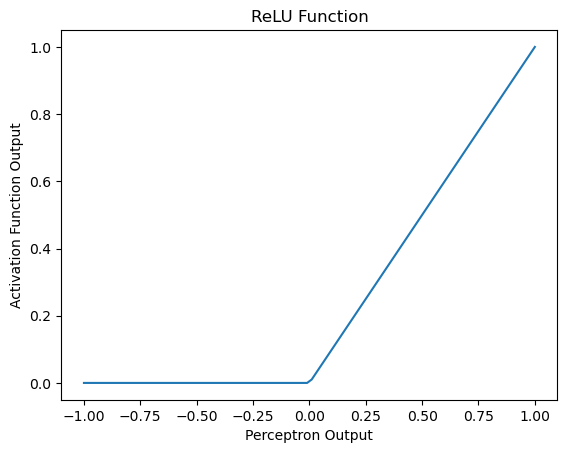

In [32]:
activations = [relu(x) for x in x_axis]

plt.plot(x_axis, activations)
plt.title("ReLU Function")
plt.xlabel("Perceptron Output")
plt.ylabel("Activation Function Output")
plt.show()

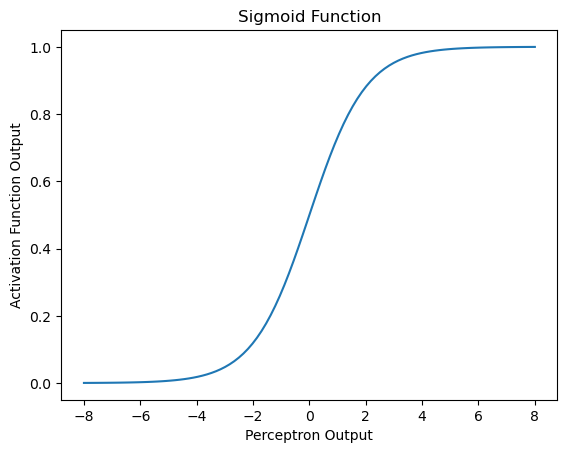

In [33]:
x_axis = np.linspace(-8, 8, 100)
activations = [sigmoid(x) for x in x_axis]

plt.plot(x_axis, activations)
plt.title("Sigmoid Function")
plt.xlabel("Perceptron Output")
plt.ylabel("Activation Function Output")
plt.show()

While the details of implementing the back-prop algorithm are beyond the scope of this fellowship, details explained within the section titled "How does backpropagation work?" in the following link: https://www.ibm.com/think/topics/backpropagation 

Instead, we will utilize the `Keras` package to implement this mechanism.

## Feed-Forward Neural Network using Keras

In this section we use Keras to implement a simple feed-forward neural network on the Olivetti faces dataset. The dataset contains 400 grayscale images (64x64 pixels) across 40 classes.

If this is your first time running this notebook, be sure to run the code block below before any other code.

In [34]:
!pip install tensorflow
!pip install pydot
!pip install graphviz

In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

The cell above imports necessary modules from TensorFlow and scikit-learn. We will use Keras (via TensorFlow) to define and train our neural network, and scikit-learn to load and split the dataset.

In [82]:
faces = fetch_olivetti_faces()

X = faces.images
y = faces.target

X_flat = faces.images.reshape((len(faces.images), -1))  # flatten to (n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

In [83]:
X_train.shape

(320, 4096)

This cell loads the Olivetti faces dataset. The data is then split into training and testing sets.

Before we go further, let's go over the basics of the Keras package. 

Think of `Keras` as the `sklearn` of deep learning. This package allows us to quickly create deep learning models without manually coding the components we've discussed in class. 

### Sequential

The `Sequential` object is a linear stack of layers. This allows us to connect layers of neurons to one another, which will subsequently flow information from the input layer towards the final output layer.

In [84]:
model = Sequential()

While a `Sequential` object contains no parameters, we instead pass in layers of neurons via the `Input` & `Dense` objects.

For example, in the code-block below, we create a simple neural network.

In [ ]:
model = Sequential([
    Input(shape=(4,)),
    Dense(1, activation='sigmoid')
])

This network contains:
* `Input`: an input layer which takes in the shape of each sample in the `shape` param.
* `Dense`: an output layer of 1 neuron.

Note that we specify that this dataset contains 4 columns by specifying the `(4,)` shape. 

In the `Sequential` object, each layer feeds into the next. We will utilize this object to train on our dataset.

### Dense

The `Dense` object is a fully connected layer of neurons that receive input from all neurons in the previous layers.

This object contains the following parameters:
* `units`: The number of neurons in this layer
* `activation`: the type of activation function (`relu`, `sigmoid`, `softmax`, etc)

Note that for our first input layer, we specify an `Input` object which takes in our samples of data. 

### Activation Functions

While there is no hard & fast rule for choosing activation functions, we generally utilize the problem space we are attempting to predict to narrow down our options. 

Generally speaking, we use...
* `ReLU` for image recognition in our hidden layer
* `Sigmoid` or `Tanh` for time series data in our hidden layer
* `Sigmoid` for binary or multilabel classification in our output layer
* `Softmax` for multiclass classification in our output layer

For more details, check out the following guide: https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

Let's use what we've learned so far to build a network that will classify our olivetti dataset...

In [ ]:
oli_model = Sequential([
    Input(shape=(4096, )),  # input layer
    Dense(64, activation='relu'), # hidden layer
    Dense(40, activation='softmax') # output layer
])

### Compile

Now that we have our neural network prepared, we can call the `compile` method which will prepare our model for training.

During this step we define the following parameters:
* `optimizer`: This defines an algorithm which optimizes the training of the model's internal weights. This is where we define the "type" of gradient descent that we apply in our model training. We could specify stochastic-gradient-descent `SGD`, however at this point we have a number of advanced optimizers we could utilize in our training: https://keras.io/api/optimizers/ 
* `loss`: This parameter defines the metric our model attempts to optimize. This could be mean-squared error (`mse`) or any other measure of error that we've discussed before (`f1-score`, `accuracy`, etc). In this case, we will utilize a metric called `sparse categorical cross entropy` which is similar to our `gini index`. This measure calculates the difference between our predicted probability distributions and our actual distributions: https://keras.io/api/losses/#loss-class
* `metrics`: Lastly, we define the list of metrics we evaluate during training and testing. This is similar to our `loss` parameter, however we only evaluate these measures by "consequence" and do not utilize these metrics to optimize our model. 

Note however that we have many more hyperparameters to choose: https://keras.io/api/models/model_training_apis/

A simple feed-forward neural network is defined here. The network has an input layer matching the flattened image size, two hidden layers with ReLU activation, and an output layer with softmax activation to classify the 40 classes.

In [90]:
oli_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### Fit

Much like `sklearn`, we also have a `.fit()` method which takes in our training data in order to learn the best weights for our neural network. Our parameters for this method include:

* `epochs`: the number of times to train our model. Like we saw in the above toy example, we want this to be sufficiently long, however at some point we reach a minimum.
* `validation_split`: The fraction of data used for validation. We will evaluate our model at the end of each epoch on this dataset. Note that unlike `sklearn` we do not take random samples for our validation set!
* `verbose`: How "talkative" is our training process. `0` indicates complete silence, `1` expresses a progress bar, and `2` prints out information for each epoch.

Again, note that we have way more parameters to choose from: https://keras.io/api/models/model_training_apis/

In [91]:
oli_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0047 - loss: 4.1736 - val_accuracy: 0.0312 - val_loss: 3.6889
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0236 - loss: 3.6876 - val_accuracy: 0.0000e+00 - val_loss: 3.6901
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0357 - loss: 3.6879 - val_accuracy: 0.0156 - val_loss: 3.6908
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0363 - loss: 3.6873 - val_accuracy: 0.0000e+00 - val_loss: 3.6915
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0208 - loss: 3.6872 - val_accuracy: 0.0000e+00 - val_loss: 3.6924
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0391 - loss: 3.6867 - val_accuracy: 0.0000e+00 - val_loss: 3.6932
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0311 - loss: 3.6863 - val_accuracy: 0.0000e+00 - val_loss: 3.6940
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0346 - loss: 3.6858 - val_accuracy: 0.0000e+00

In summary, the model is compiled using the Adam optimizer and trained using sparse categorical crossentropy loss. The training is run for 100 epochs with a validation split of 20%. 

As we can see however, our accuracy is quite abysmal! 

When evaluating our model on our testing set we get an accuracy of 0%.

In [96]:
loss, accuracy = oli_model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, Test Accuracy: {accuracy}")

Loss: 3.7652804851531982, Test Accuracy: 0.0


While we shouldn't expect anything interesting, let's see which predictions our model generated for our faces.

In [103]:
yhat = oli_model.predict(X_test)

yhat[0]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([0.02412265, 0.02843325, 0.02425915, 0.02206867, 0.02211592,
       0.01588953, 0.0318695 , 0.01791327, 0.02211445, 0.02423262,
       0.02422255, 0.02632575, 0.026306  , 0.02633416, 0.02422958,
       0.02611207, 0.02639298, 0.02425068, 0.02421422, 0.02830173,
       0.02827723, 0.02833569, 0.0262067 , 0.02619331, 0.02633845,
       0.02616597, 0.01968905, 0.02205837, 0.02824988, 0.02842114,
       0.02828885, 0.02635998, 0.02414466, 0.02637161, 0.02210147,
       0.0283364 , 0.02844705, 0.02635895, 0.02211894, 0.01782762],
      dtype=float32)

Note that we get a vector of probabilities that sum to 100% when creating our predictions. If we want to associate these probabilities with predictions, we must utilize the `argmax` method.

In [104]:
sum(yhat[0])

np.float32(1.0)

In [106]:
predicted_classes = np.argmax(yhat, axis=1)

predicted_classes

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

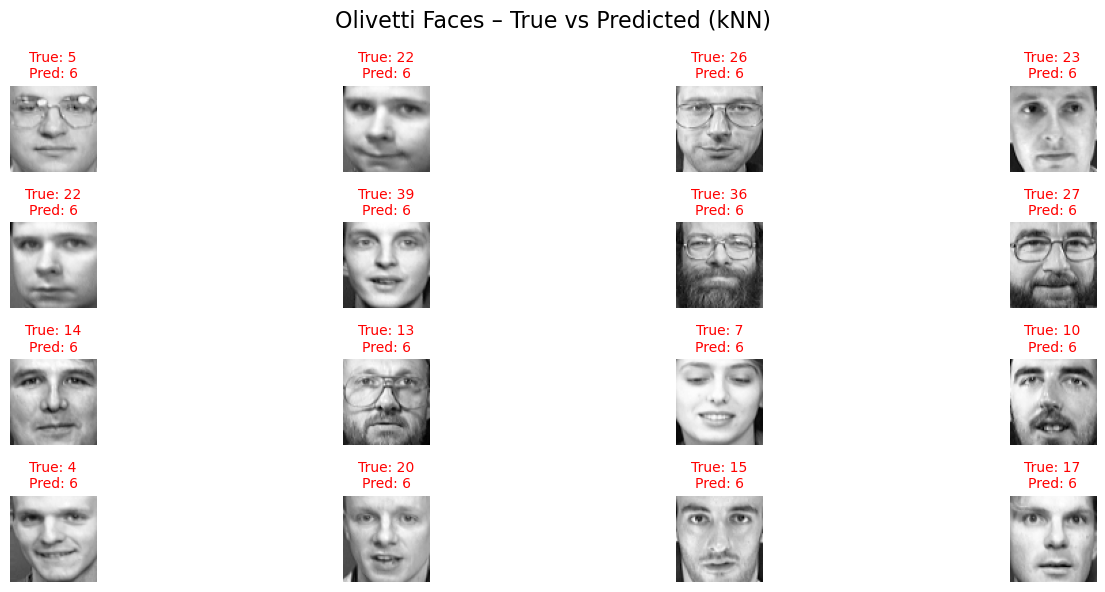

In [107]:
X_images = faces.images


_, _, _, _, _, idx_test = train_test_split(
    X_flat, faces.target, np.arange(len(faces.images)),
    test_size=0.3, random_state=42
)

# Step 2: Visualize predictions with true labels
n_samples_to_plot = 16
sample_idxs = np.random.choice(len(predicted_classes), n_samples_to_plot, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_idxs):
    img = X_images[idx_test[idx]]
    true_label = y_test[idx]
    pred_label = predicted_classes[idx]

    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color, fontsize=10)
    plt.axis('off')

plt.suptitle("Olivetti Faces – True vs Predicted (kNN)", fontsize=16)
plt.tight_layout()
plt.show()

Welp, it looks like every face was predicted as class `6`. Obviously we need to try something different.

Let's try bumping the number of nodes in our hidden layer on this model to see if we get better performance.

## Intermediate Outputs using Keras

Here we experiment with different numbers of intermediate nodes. We also extract outputs from intermediate layers to study what features the network is learning.

In [ ]:
model_alt = Sequential([
    Input(shape=(4096, )),  # input layer
    Dense(128, activation='relu'), # hidden layer
    Dense(40, activation='softmax') # 
])

In [ ]:
model_alt.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
model_alt.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0132 - loss: 4.5774 - val_accuracy: 0.0156 - val_loss: 3.9241
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0193 - loss: 3.6777 - val_accuracy: 0.0938 - val_loss: 3.6692
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0411 - loss: 3.6215 - val_accuracy: 0.0156 - val_loss: 3.6879
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0293 - loss: 3.6308 - val_accuracy: 0.0156 - val_loss: 3.6600
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0436 - loss: 3.5864 - val_accuracy: 0.0625 - val_loss: 3.6547
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0568 - loss: 3.5619 - val_accuracy: 0.0469 - val_loss: 3.6277
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0856 - loss: 3.5174 - val_accuracy: 0.0312 - val_loss: 3.6431
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0511 - loss: 3.5156 - val_accuracy: 0.0469 - val_loss:

Amazing! Just by doubling the number of nodes in my intermediate layer & the epochs, we now have a training accuracy of 84%

Adding more neurons increases the models capacity to "learn", allowing it to more deeply analyze the complex patterns that make up a face in our dataset. 

When we have a highly dimensional dataset we also need highly dimensional neurons to extract useful features out of our flattened pixels.

But, before we claim victory, let's evaluate our model on our testing dataset.

In [132]:
loss, accuracy = model_alt.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, Test Accuracy: {accuracy}")

Loss: 1.8810923099517822, Test Accuracy: 0.4625000059604645


Darn! Better than 0% but still pretty poor. Let's continue experimenting with our deep learning architecture to see if we can extract better predictive capabilities. Let's try for another layer.

In [138]:
model_3 = Sequential([
    Input(shape=(4096, )),  # input layer
    Dense(128, activation='relu'), # hidden layer 1
    Dense(64, activation='tanh'), # hidden layer 2
    Dense(40, activation='softmax') # output layer
])

model_3.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0143 - loss: 3.9097 - val_accuracy: 0.0000e+00 - val_loss: 3.8613
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0200 - loss: 3.7709 - val_accuracy: 0.0312 - val_loss: 3.9301
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0482 - loss: 3.6540 - val_accuracy: 0.0312 - val_loss: 3.8471
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0527 - loss: 3.6315 - val_accuracy: 0.0625 - val_loss: 3.8126
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1209 - loss: 3.5564 - val_accuracy: 0.0469 - val_loss: 3.7555
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0965 - loss: 3.5183 - val_accuracy: 0.0469 - val_loss: 3.8118
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1318 - loss: 3.4604 - val_accuracy: 0.0625 - val_loss: 3.6820
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0981 - loss: 3.4495 - val_accuracy: 0.0312 - val_l

In [139]:
loss, accuracy = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, Test Accuracy: {accuracy}")

Loss: 0.6324782967567444, Test Accuracy: 0.875


Great! An 86% testing accuracy!

**Challenge**: Can you beat my testing accuracy? Try implementing variations on my neural network architecture. Or better yet, search up what previous architectures have worked for image recognition.

In [143]:
yhat = model_3.predict(X_test)

predicted_classes = np.argmax(yhat, axis=1)

predicted_classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12, 37, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 14, 11, 19, 26,  5,
       23, 11, 25, 20,  0, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37, 14, 22, 17,  3, 15, 12, 29, 36,  0, 10,  3, 35, 26,
       37,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28])

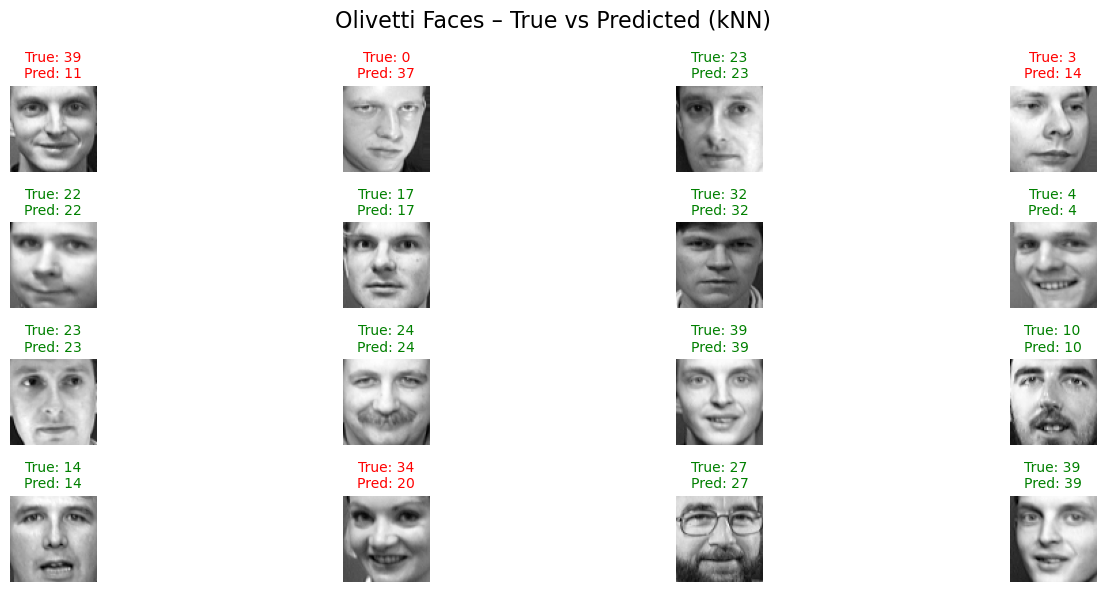

In [144]:
X_images = faces.images

_, _, _, _, _, idx_test = train_test_split(
    X_flat, faces.target, np.arange(len(faces.images)),
    test_size=0.3, random_state=42
)

# Step 2: Visualize predictions with true labels
n_samples_to_plot = 16
sample_idxs = np.random.choice(len(predicted_classes), n_samples_to_plot, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_idxs):
    img = X_images[idx_test[idx]]
    true_label = y_test[idx]
    pred_label = predicted_classes[idx]

    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color, fontsize=10)
    plt.axis('off')

plt.suptitle("Olivetti Faces – True vs Predicted (kNN)", fontsize=16)
plt.tight_layout()
plt.show()

The cool thing about this dataset is that we can "peel back" the neural network to view which features our network has picked up.

We do this by extracting the weights of the connections between our first and second layer. Using these weights, we can visualize what the network "sees."

In [154]:
weights, biases = model_3.layers[0].get_weights()

print("weights shape:", weights.shape)  # (4096, 128)
print("biases shape:", biases.shape)    # (128,)

weights shape: (4096, 128)
biases shape: (128,)


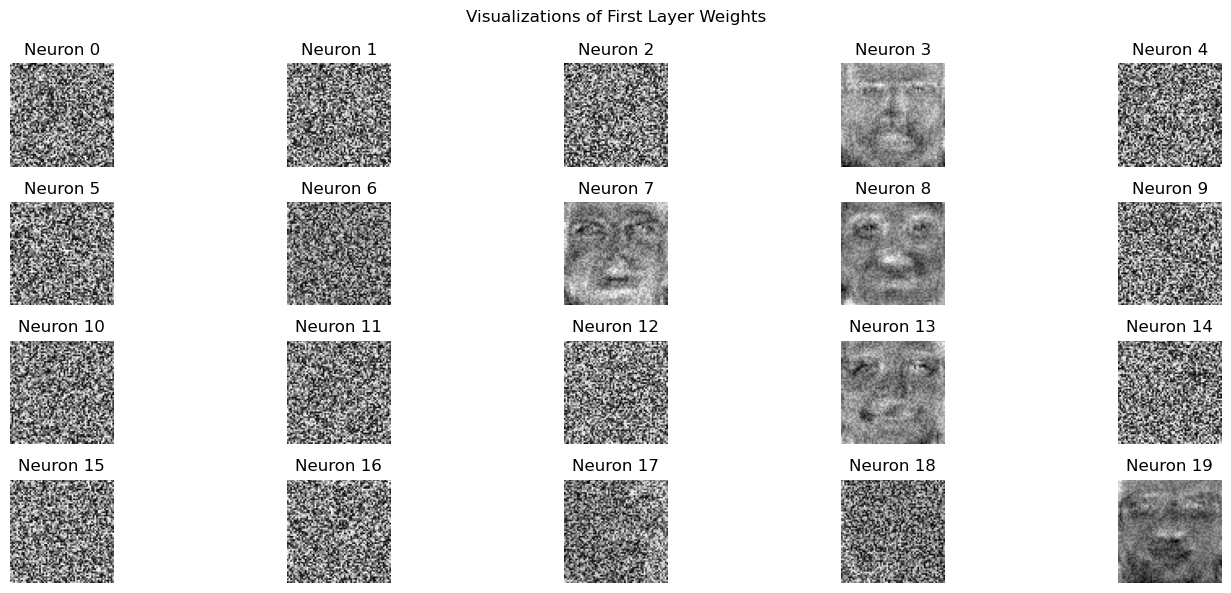

In [155]:
import matplotlib.pyplot as plt

# Visualize the first 20 neurons' weight vectors as 64x64 images
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    weight_vector = weights[:, i]
    weight_image = weight_vector.reshape((64, 64))  # reshape from 4096 to 64x64

    ax.imshow(weight_image, cmap='gray')
    ax.set_title(f'Neuron {i}')
    ax.axis('off')

plt.suptitle("Visualizations of First Layer Weights")
plt.tight_layout()
plt.show()

Note that while most neurons are "dead' or do not pick up on any meaningful features, we have around 5 neurons which sufficiently "fired" and detected the features of a face (much like our PCA algorithm yesterday).

This could be related to the problem of [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

For this reason, we often utilize a [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) for image detection.